## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Part 1 - Load the data
car_data = pd.read_csv("./data/car_data.csv")
print("Car data shape:", car_data.shape)
print("Car data columns:", car_data.columns)
car_data.head()

Car data shape: (1000, 5)
Car data columns: Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [2]:
# Part 2 - Summarize variables
print("Types of variables:")
print(car_data.dtypes, "\n")

car_data.info()
car_data.describe()

Types of variables:
User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [3]:
# Part 2 - Look for missing data
print("There is no missing data in this dataset.\n")
print("Counts for missing data:")
car_data.isnull().sum()

There is no missing data in this dataset.

Counts for missing data:


User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [4]:
# Part 2 - Convert Gender variable into dummy variable
print("Gender value counts:")
print(car_data["Gender"].value_counts(), "\n")

car_data["GenderDummy"] = 1
car_data.loc[car_data["Gender"] == "Male", "GenderDummy"] = 0
print("Gender dummy value counts:")
print(car_data["GenderDummy"].value_counts())

Gender value counts:
Female    516
Male      484
Name: Gender, dtype: int64 

Gender dummy value counts:
1    516
0    484
Name: GenderDummy, dtype: int64


In [5]:
# Part 2 - Create a matrix X of predictors and outcome y equaling Purchase
X = car_data.loc[:, ["Age", "AnnualSalary"]]
y = car_data["Purchased"]

In [6]:
# Part 3 - MaxMin-normalize Age and AnnualSalary in X  --> CHECK
def maxmin(z):
    z = (z - min(z))/(max(z)-min(z))
    return z

X = X.apply(maxmin)
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [7]:
# Part 4 - Split the sample into a a ~80% training dataset and a ~20% testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

Optimal number of neightbors k to use is: k = [11]


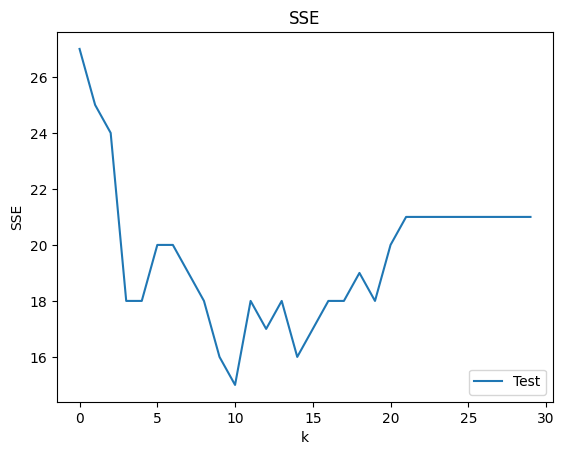

In [8]:
# Part 5 - Determine the optimal number of neighbors k to use
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_bar = 30
k_grid = np.arange(1, k_bar)

SSE = np.zeros(k_bar)
for k in range (k_bar):
    model = KNeighborsClassifier(n_neighbors= k + 1)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test - y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = k_grid[min_index]
print("Optimal number of neightbors k to use is: k = " + str(k_star))

plt.plot(np.arange(0, k_bar), SSE, label = "Test")
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc = "lower right")
plt.title("SSE")
plt.show()

In [9]:
# Part 6 - Run model for optimal number of neighbors on testing data
model = KNeighborsClassifier(n_neighbors = 11)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

# Cross tabulate predicted outcomes on actual outcomes
pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,117,9
1,6,68


**RESPONSE FOR PART 6:**\
It appears that most of the cases are predicted correctly. The model predicted a sale 9 times when it failed to occur as seen by the 9 times a 0 was classified as a 1. The model predicted no sale when one did occur 6 times as seen by the 6 times a 1 was classifed as a 0. The proportion of incorrect predictions is 15/200 = 0.075 and the proportion of correct is 185/200 = 0.925. Therefore, the model provided fairly accurate predictions overall.


In [10]:
# Compute confusion matrices separately for men and women
X = car_data.loc[:, ["Age", "AnnualSalary", "Gender"]]
y = car_data["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model = KNeighborsClassifier(n_neighbors = 11)
fitted_model = model.fit(X_train.drop("Gender", axis = 1), y_train)
y_hat = fitted_model.predict(X_test.drop("Gender", axis = 1))

y_hat_male = y_hat[X_test["Gender"] == "Male"]
y_hat_female = y_hat[X_test["Gender"] == "Female"]
y_male = y_test[X_test["Gender"] == "Male"]
y_female = y_test[X_test["Gender"] == "Female"]

print("Confusion matrix for women:")
pd.crosstab(y_female, y_hat_female)

Confusion matrix for women:


col_0,0,1
Purchased,,
0,44,14
1,9,30


In [11]:
print("Confusion matrix for men:")
pd.crosstab(y_male, y_hat_male)

Confusion matrix for men:


col_0,0,1
Purchased,,
0,57,11
1,11,24


**RESPONSE FOR PART 7:**\
Looking at the confusion matrix for women it seems that about 74/97 = 0.76 of predictions are correct while for men it seems that about 81/103 = 0.79 of predictions are correct. Based on these proportions, it appears that the model makes more accurate predictions for men rather than women. The difference in accuracy betweeen men and women is about 0.79 - 0.76 = 0.03. 

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [12]:
# Part 1 - Load the data and drop variables
cars = pd.read_csv("./data/USA_cars_datasets.csv")
cars = cars[["price", "year", "mileage"]]

# Look for NAs
if cars.isnull().sum().sum() > 0 :
  print("The dataset contains missing values.")
else:
  print("The dataset doesn't contain missing values.")

# Examine head and dimensions of the data
print("Cars dataset shape:", cars.shape)
cars.head()

The dataset doesn't contain missing values.
Cars dataset shape: (2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [13]:
# Part 2 - Maxmin normalize year and mileage
X = cars.loc[:, ["year", "mileage"]]
y = cars["price"]

def maxmin(z):
    z = (z - min(z))/(max(z)-min(z))
    return z

X = X.apply(maxmin)
X.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [14]:
# Part 3 - Split the same into ~80% for training and ~20% for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

SSE:  59535453016.111115


<Axes: ylabel='price'>

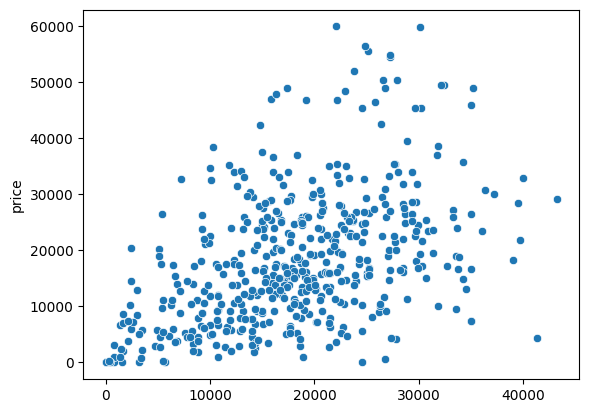

In [15]:
# Part 4 - Use kNN for regression to predict using year and mileage
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

# k = 3
model = kNNRegression(n_neighbors = 3)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test - y_hat)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_hat, y = y_test)


SSE:  52797071788.61


<Axes: ylabel='price'>

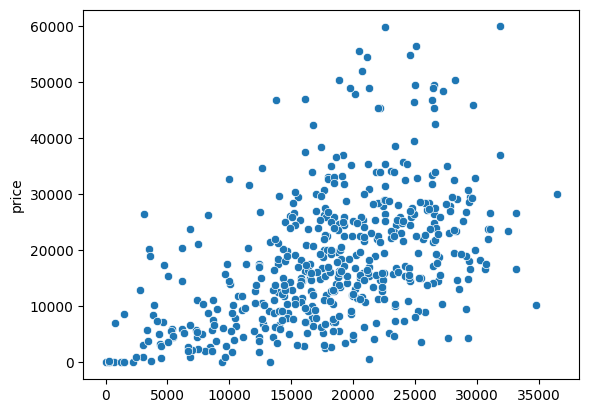

In [16]:
# Part 4 - Use kNN for regression to predict using year and mileage
# k = 10
model = kNNRegression(n_neighbors = 10)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test - y_hat)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_hat, y = y_test)

SSE:  48144779760.78079


<Axes: ylabel='price'>

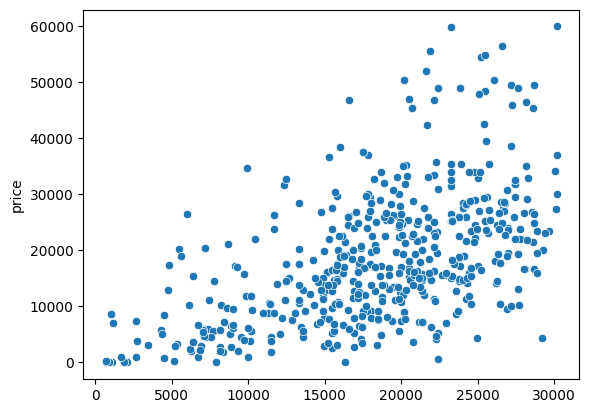

In [17]:
# Part 4 - Use kNN for regression to predict using year and mileage
# k = 25
model = kNNRegression(n_neighbors = 25)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test - y_hat)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_hat, y = y_test)

SSE:  46653653775.386795


<Axes: ylabel='price'>

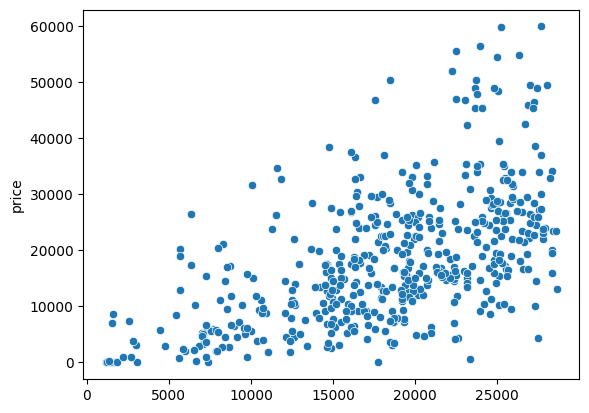

In [18]:
# Part 4 - Use kNN for regression to predict using year and mileage
# k = 50
model = kNNRegression(n_neighbors = 50)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test - y_hat)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_hat, y = y_test)

SSE:  47303245067.6015


<Axes: ylabel='price'>

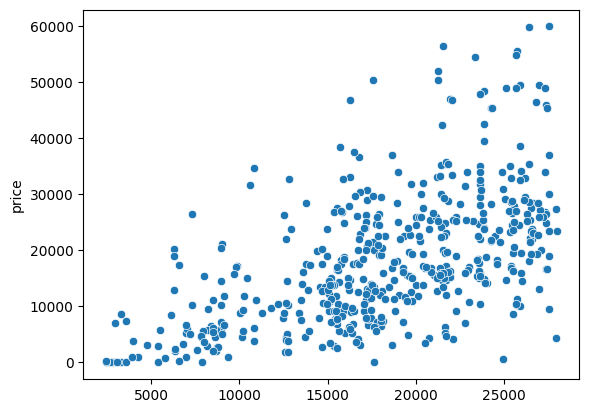

In [19]:
# Part 4 - Use kNN for regression to predict using year and mileage
# k = 100
model = kNNRegression(n_neighbors = 100)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test - y_hat)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_hat, y = y_test)

SSE:  48533257066.189804


<Axes: ylabel='price'>

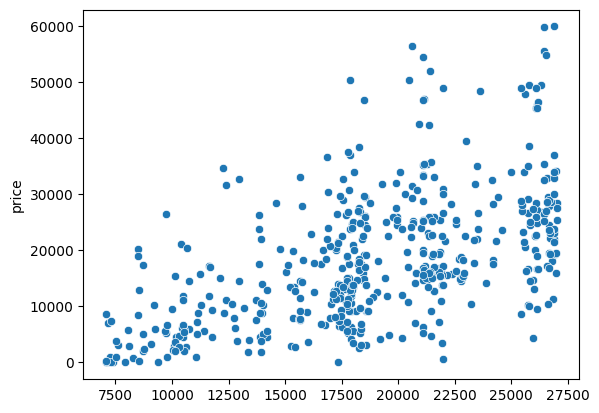

In [20]:
# Part 4 - Use kNN for regression to predict using year and mileage
# k = 300
model = kNNRegression(n_neighbors = 300)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)
sse = np.sum( (y_test - y_hat)**2 )
print("SSE: ", sse)

sns.scatterplot(x = y_hat, y = y_test)

**RESPONSE FOR PART 4:**\
As we increase k from 3 to 50, we can see that the SSE gradually decreases from about 59535453016 to about 46653653775 as we increase the number of neighbors. However, as we continue increasing k to 100 and 300, the SSE begins to increase again to about 48533257066. In addition to these trends in SSE, we can see in the plots that originally in k = 3 the test values plotted against the predicted values were pretty spread out. Increasing the number of neighbors to around 50 resulted in these points to start to form a more clear, positive, diagonal line. Similar to the SSE trends however, once the k value increased to 100 and 300, the trend appears to be broken and the data points scatter out more so that a line does not appear as obvious anymore.

Optimal number of neightbors k to use is: k = [47]


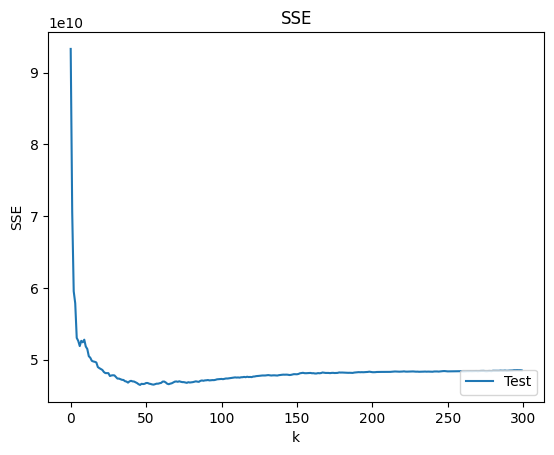

In [21]:
# Part 5 - Determine the optimal k
k_bar = 300
k_grid = np.arange(1, k_bar)

SSE = np.zeros(k_bar)
for k in range (k_bar):
    model = kNNRegression(n_neighbors= k + 1)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test - y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = k_grid[min_index]
print("Optimal number of neightbors k to use is: k = " + str(k_star))

plt.plot(np.arange(0, k_bar), SSE, label = "Test")
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc = "lower right")
plt.title("SSE")
plt.show()

**RESPONSE FOR PART 6:**\
In the plots of predicted versus actual prices as k varied, we could see as they increased from k = 3 to k = 50, a more clear, positive trend began to form. Once the number of neighbors was increased to 100 and 300, the trend began to appear not as obvious as the data points started to disperse and spread out throughout the plot. At k = 50, the trend was most clear which makes sense given that the optimal number of neighbors k to use was found to be 47 in the previous step. As such, the models with k neighbors less than 50 were likely underfitting the data and the models with k neighbors greater than 50 were likely overfitting the data, since the trend was not as clear with more spread out data points for these plots. 

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [30]:
# Part 1 - Running the code
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

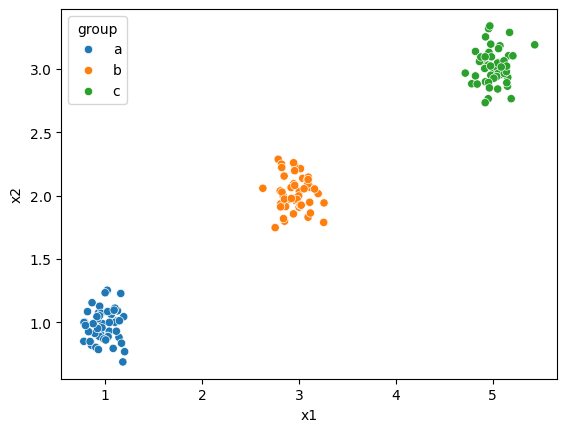

In [31]:
# Part 2 - Making scatterplot of (X1, X2) for noise = 0.125
sns.scatterplot(data = df0_125, x = "x1", y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

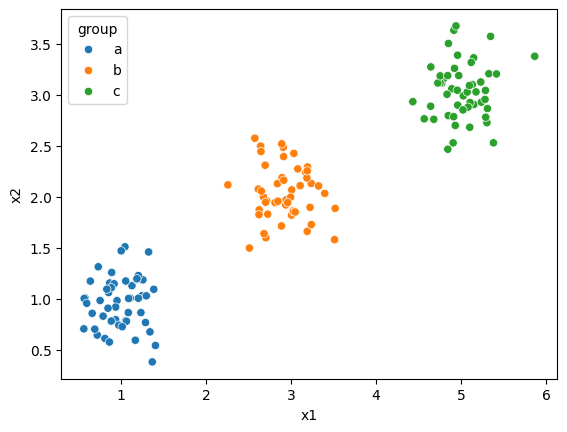

In [32]:
# Part 2 - Making scatterplot of (X1, X2) for noise = 0.25
sns.scatterplot(data = df0_25, x = "x1", y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

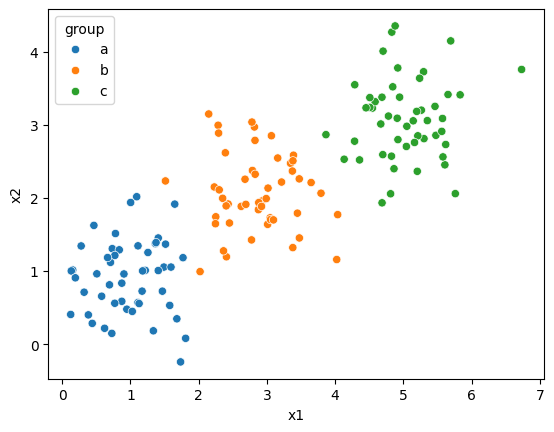

In [33]:
# Part 2 - Making scatterplot of (X1, X2) for noise = 0.5
sns.scatterplot(data = df0_5, x = "x1", y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

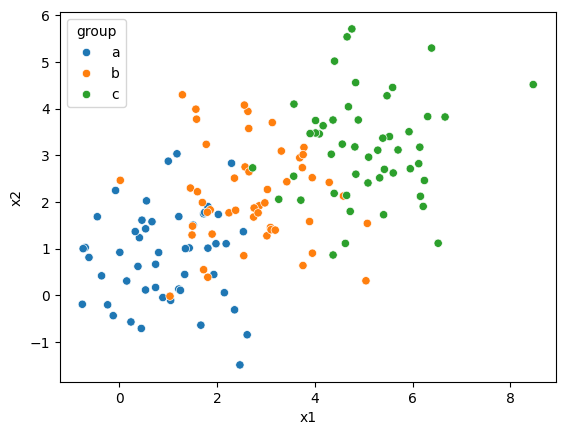

In [34]:
# Part 2 - Making scatterplot of (X1, X2) for noise = 1.0
sns.scatterplot(data = df1_0, x = "x1", y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

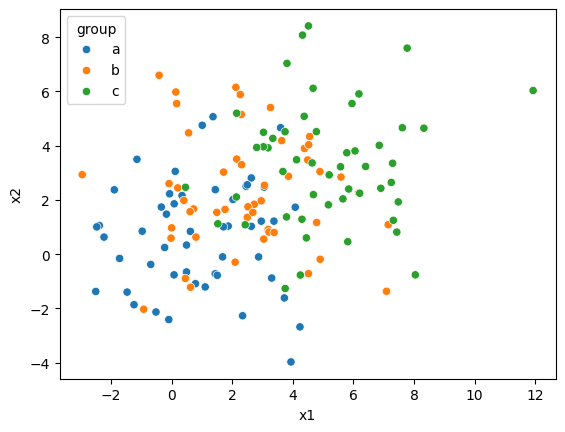

In [35]:
# Part 2 - Making scatterplot of (X1, X2) for noise = 2.0
sns.scatterplot(data = df2_0, x = "x1", y = "x2", hue = "group")

**PART 2 RESPONSE:**\
As the noise goes up from 0.125 to 2.0....

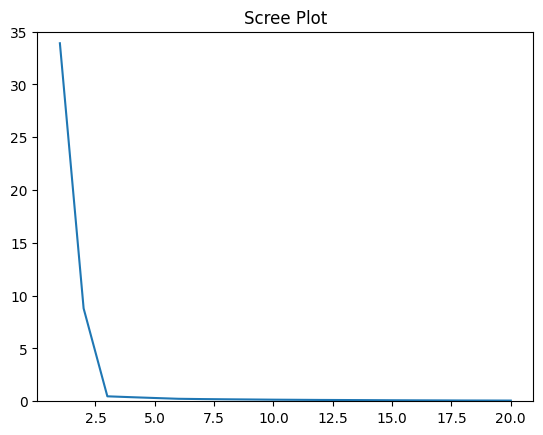

In [38]:
# Part 3 - Making scree plots
from sklearn.cluster import KMeans 

def maxmin(z):
    z = (z - min(z))/(max(z)-min(z))
    return z

def plot_scree(data):
    X = data.loc[ : , ['x1','x2'] ] 
    X = X.apply(maxmin) 

    k_bar = 20
    k_grid = np.arange(1,k_bar + 1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar): 
        model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10) 
        model = model.fit(X) 
        SSE[k] = model.inertia_ 

    scree_plot, axes = plt.subplots()
    sns.lineplot(x = k_grid, y = SSE).set_title("Scree Plot")
    axes.set_ylim(0, 35)
    
# Scree plot for noise = 0.125
plot_scree(df0_125)

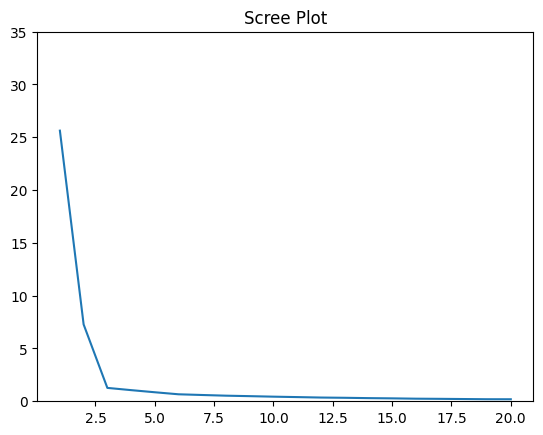

In [39]:
# Scree plot for noise = 0.25
plot_scree(df0_25)

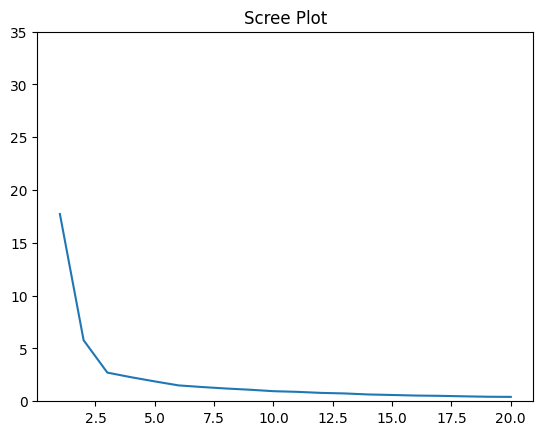

In [40]:
# Scree plot for noise = 0.5
plot_scree(df0_5)

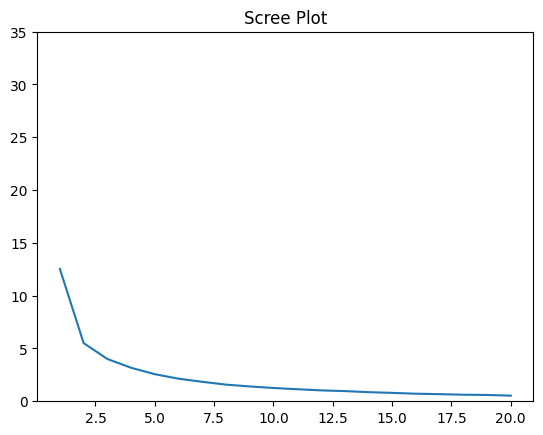

In [41]:
# Scree plot for noise = 1.0
plot_scree(df1_0)

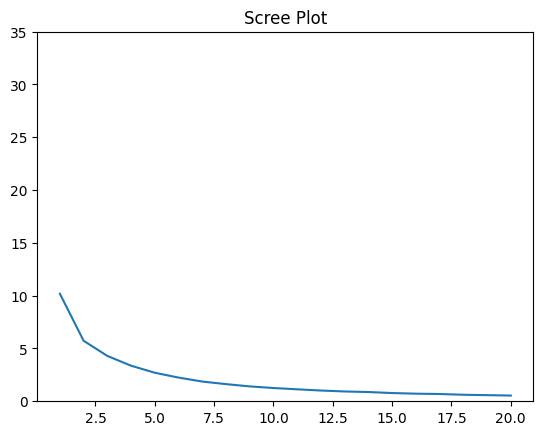

In [42]:
# Scree plot for noise = 2.0
plot_scree(df2_0)

**PART 4 RESPONSE:**\

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?